In [6]:
! pip install pandas numpy matplotlib plotly


  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached tenacity-8.5.0-py3-none-any.whl (28 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python312\\etc'
Consider using the `--user` option or check the permissions.



C:\Users\Moneykicks\AppData\Local\Temp\ipykernel_2524\156813808.py:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




EDA images and files have been saved.


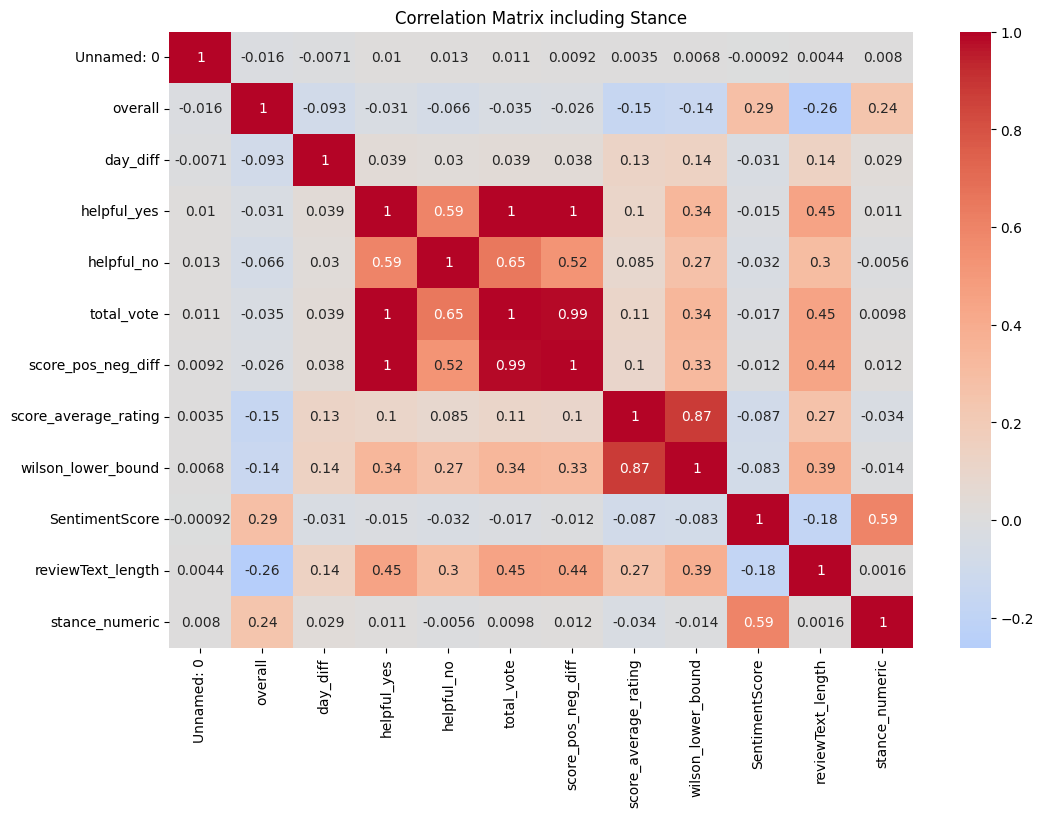

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import os

# Load the dataset
file_path = r'D:\Dataset-SA.csv\csv\AllDataSets\WithOutAdding\1DataSET\5kReviewWithSentimentAmazon.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at {file_path}")
df = pd.read_csv(file_path)

# Add a column for review length
df['reviewText_length'] = df['reviewText'].apply(len)

# Clean text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['cleaned_reviewText'] = df['reviewText'].apply(clean_text)

# 1. Distribution of Review Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['reviewText_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.savefig('review_length_distribution.png')
plt.close()

# 2. Word Cloud of Reviews
all_reviews = ' '.join(df['reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.savefig('word_cloud.png')
plt.close()

# 3. Distribution of Sentiment Labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Stance', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Stance')
plt.ylabel('Count')
plt.savefig('sentiment_label_distribution.png')
plt.close()

# 4. Class Distribution with Different Colors
stance_counts = df['Stance'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=stance_counts.index, y=stance_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Stance')
plt.ylabel('Count')
plt.savefig('class_distribution.png')
plt.close()

# 5. Correlation Matrix (if applicable)
numeric_cols = df.select_dtypes(include=['number']).columns
if len(numeric_cols) > 0:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')
    plt.close()
else:
    print("No numeric columns available for correlation analysis.")

# Save a sample of cleaned reviews as text
with open('sample_cleaned_reviews.txt', 'w') as file:
    file.write('\n'.join(df['cleaned_reviewText'].sample(10)))

print("EDA images and files have been saved.")


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data frame (replace this with your actual data frame)
# df = pd.read_csv('your_data.csv')

# Convert categorical stance to numerical
stance_mapping = {'Supportive': 1, 'Neutral': 0, 'Opposed': -1}
df['stance_numeric'] = df['Stance'].map(stance_mapping)

# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number']).columns

# Handle missing values if any (e.g., fill with mean or drop)
df = df[numeric_columns].dropna()  # Or use df.fillna(df.mean()) for filling missing values

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix including Stance')
plt.show()



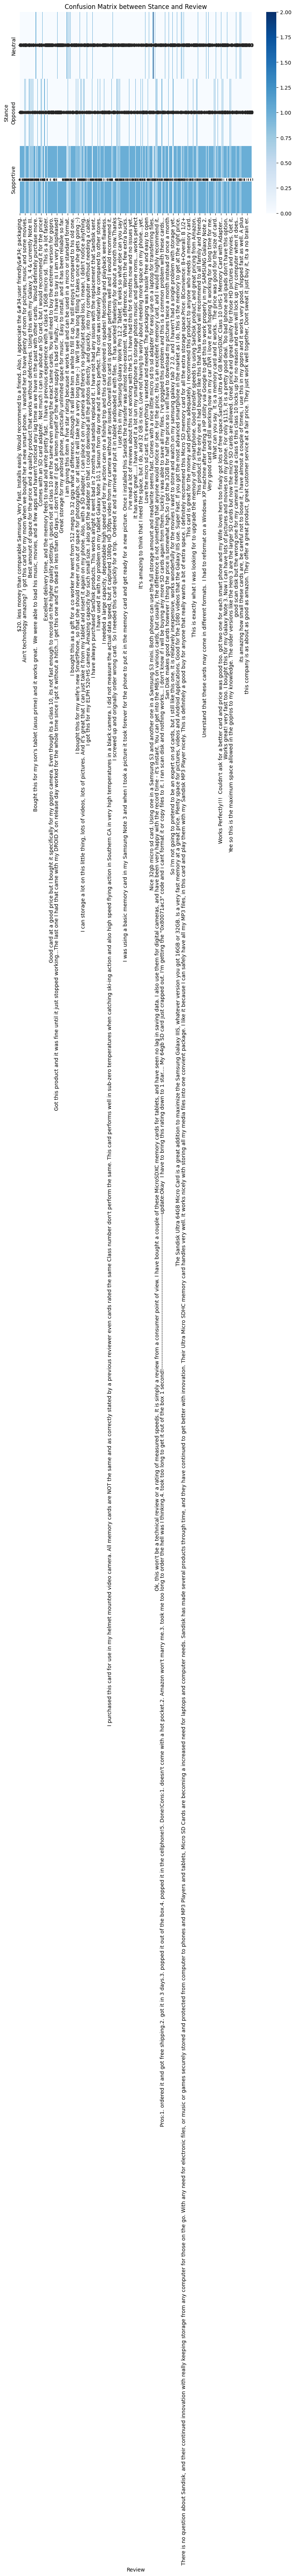

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected file path
df = pd.read_csv(r'D:\Dataset-SA.csv\csv\AllDataSets\WithOutAdding\1DataSET\5kReviewWithSentimentAmazon.csv')

# Assuming 'stance' and 'review' are your columns of interest
# Create a confusion matrix using crosstab
confusion_matrix = pd.crosstab(df['Stance'], df['reviewText'], rownames=['Stance'], colnames=['Review'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix between Stance and Review')
plt.show()
